In [35]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
import torch

sys.path.append('/eagle/MDClimSim/mjp5595/ml4dvar/stormer/')
from stormer_utils_pangu import StormerWrapperPangu
from varsStormer import varsStormer

### Plot Background vs Analysis Forecasts

var_lim_min : 215.83414
var_lim_max : 312.9802
inc_lim_min : -36.164764
inc_lim_max : 44.09099


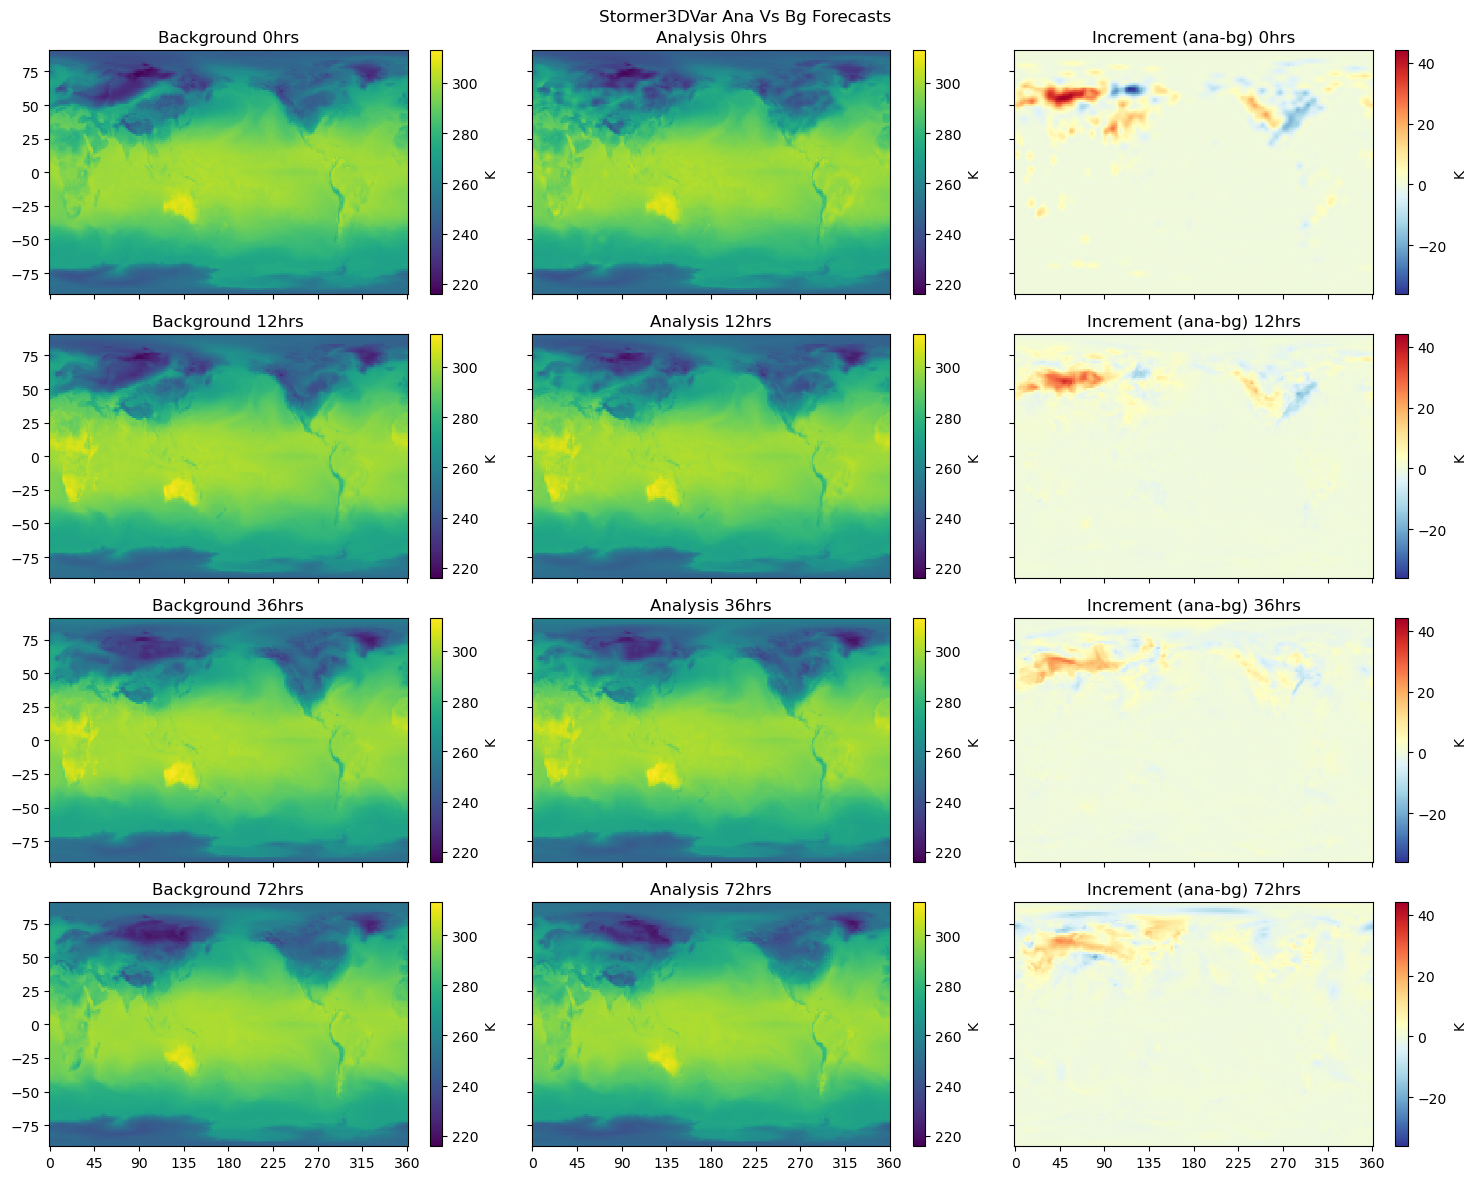

In [38]:
#ana_fc_f = '/eagle/MDClimSim/mjp5595/data/stormer/var3d_1B/data/raw_forecasts_0_1201012014.h5'
#ana_fc_f = '/eagle/MDClimSim/mjp5595/data/stormer/var3d_raw_ana_test/data/raw_forecasts_0_1201012014.h5'
ana_fc_f = '/eagle/MDClimSim/mjp5595/data/stormer/var3d_raw_ana/data/raw_forecasts_0_1201012014.h5'
bg_fc_f = '/eagle/MDClimSim/mjp5595/data/stormer/stormer_init_bg_forecasts/0000.h5'

ana_fc = h5py.File(ana_fc_f)
bg_fc = h5py.File(bg_fc_f)

lat = np.linspace(-90,90,128)
lon = np.linspace(0,360,256)

forecast_scales = [0,12,36,72]

var_lim_min = float(np.inf)
var_lim_max = float(-np.inf)
for fs in forecast_scales:
    var_lim_min = min(var_lim_min,np.min(bg_fc[str(fs)][0]),np.min(ana_fc[str(fs)][0]))
    var_lim_max = max(var_lim_max,np.max(bg_fc[str(fs)][0]),np.max(ana_fc[str(fs)][0]))
print('var_lim_min :',var_lim_min)
print('var_lim_max :',var_lim_max)

inc_lim_min = float(np.inf)
inc_lim_max = float(-np.inf)
for fs in forecast_scales:
    inc_lim_min = min(inc_lim_min,np.min(ana_fc[str(fs)][0]-bg_fc[str(fs)][0]))
    inc_lim_max = max(inc_lim_max,np.max(ana_fc[str(fs)][0]-bg_fc[str(fs)][0]))
print('inc_lim_min :',inc_lim_min)
print('inc_lim_max :',inc_lim_max)

fig, axs = plt.subplots(4, 3, sharex = True, sharey = True, figsize=(15,12))
for i,fs in enumerate(forecast_scales):
    pc_era50 = axs[i,0].pcolormesh(lon, lat, bg_fc[str(fs)][0], cmap='viridis', vmin=var_lim_min, vmax=var_lim_max)
    plt.colorbar(pc_era50, ax = axs[i, 0],label='K')
    axs[i, 0].set_title('Background {}hrs'.format(fs))
    axs[i, 0].set_xticks(np.linspace(0,360,9))

    pc_ana0 = axs[i,1].pcolormesh(lon, lat, ana_fc[str(fs)][0], cmap='viridis', vmin=var_lim_min, vmax=var_lim_max)
    plt.colorbar(pc_ana0, ax = axs[i, 1],label='K')
    axs[i, 1].set_title('Analysis {}hrs'.format(fs))

    pc_inc0 = axs[i,2].pcolormesh(lon, lat, ana_fc[str(fs)][0]-bg_fc[str(fs)][0], 
                                  cmap='RdYlBu_r', vmin=inc_lim_min, vmax=inc_lim_max)
    plt.colorbar(pc_inc0, ax = axs[i, 2], label='K')
    axs[i, 2].set_title('Increment (ana-bg) {}hrs'.format(fs))

fig.suptitle('Stormer3DVar Ana Vs Bg Forecasts')
plt.tight_layout()

plt.savefig('/eagle/MDClimSim/mjp5595/ml4dvar/plots/stormer3d_ana_vs_bg_forecasts.png')
#axs[0, 0].set_ylabel('Lat')
#axs[1, 0].set_ylabel('Lat')
#axs[1, 0].set_xlabel('Lon')
#axs[1, 1].set_xlabel('Lon')
#axs[1, 2].set_xlabel('Lon')


In [2]:
vars_stormer = varsStormer().vars_stormer
stormer_wrapper = StormerWrapperPangu(
    root_dir='/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_from_full_res_1_step_6hr_h5df/',
    variables=vars_stormer,
    net=None,
    base_lead_time=[6],
    #ckpt=ckpt_pth,
    #device=device,
    )

checkpoint model loaded


In [3]:
bg_f = '/eagle/MDClimSim/mjp5595/data/stormer/var3d_1B/data/background_0_1201012014.npy'
ana_fc_f = '/eagle/MDClimSim/mjp5595/data/stormer/var3d_1B/data/forecasts_0_1201012014.h5'
raw_fc_f = '/eagle/MDClimSim/mjp5595/data/stormer/stormer_val_forecasts_2014/0002.h5'
bg_fc_f = 'eagle/MDClimSim/mjp5595/data/stormer/stormer_init_bg_forecasts/0000.h5'

era5_f0 = '/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_from_full_res_1_step_6hr_h5df/train/2014_0002.h5'
era5_f6 = '/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_from_full_res_1_step_6hr_h5df/train/2014_0003.h5'
era5_f12 = '/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_from_full_res_1_step_6hr_h5df/train/2014_0004.h5'
era5_f48 = '/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_from_full_res_1_step_6hr_h5df/train/2014_0010.h5'

bg = np.load(bg_f)
ana_fc = h5py.File(ana_fc_f)
raw_fc = h5py.File(raw_fc_f)
bg_fc = h5py.File(bg_fc_f)
era5_0 = h5py.File(era5_f0)
era5_6 = h5py.File(era5_f6)
era5_12 = h5py.File(era5_f12)
era5_48 = h5py.File(era5_f48)

In [4]:
era5_0_data = era5_0['input/2m_temperature']
era5_6_data = era5_6['input/2m_temperature']
era5_12_data = era5_12['input/2m_temperature']
era5_48_data = era5_48['input/2m_temperature']
raw_fc_0 = raw_fc['0'][0]
raw_fc_6 = raw_fc['6'][0]
raw_fc_12 = raw_fc['12'][0]
raw_fc_48 = raw_fc['48'][0]

diff0 = era5_0_data - raw_fc_0
print('np.max(era5_data) :',np.max(era5_0_data))
print('np.min(era5_data) :',np.min(era5_0_data))
print('np.max(diff0) :',np.max(diff0))
print('np.min(diff0) :',np.min(diff0))

diff6 = era5_6_data - raw_fc_6
print('np.max(era5_data) :',np.max(era5_6_data))
print('np.min(era5_data) :',np.min(era5_6_data))
print('np.max(diff6) :',np.max(diff6))
print('np.min(diff6) :',np.min(diff6))

diff12 = era5_12_data - raw_fc_12
print('np.max(era5_data) :',np.max(era5_12_data))
print('np.min(era5_data) :',np.min(era5_12_data))
print('np.max(diff12) :',np.max(diff12))
print('np.min(diff12) :',np.min(diff12))

diff48 = era5_48_data - raw_fc_48
print('np.max(era5_data) :',np.max(era5_48_data))
print('np.min(era5_data) :',np.min(era5_48_data))
print('np.max(diff48) :',np.max(diff48))
print('np.min(diff48) :',np.min(diff48))

np.max(era5_data) : 312.5342
np.min(era5_data) : 220.25926
np.max(diff0) : 0.0
np.min(diff0) : 0.0
np.max(era5_data) : 309.8768
np.min(era5_data) : 220.6561
np.max(diff6) : 4.0334473
np.min(diff6) : -3.0632477
np.max(era5_data) : 316.09036
np.min(era5_data) : 220.754
np.max(diff12) : 4.320648
np.min(diff12) : -4.666046
np.max(era5_data) : 313.03394
np.min(era5_data) : 224.37091
np.max(diff48) : 5.383362
np.min(diff48) : -6.000641


In [5]:
# bg.shape - (1,69,128,256)
# ana_fc['0'][:].shape - (69,128,256)
# raw_fc['0'][:].shape - (69,128,256)
# era5['input/2m_temperature'] - (128,256)

ana_init.shape min,mean,max :  (69, 128, 256) -9.481246 -0.010141185 6.32683
ana_denorm.shape min,mean,max :  (128, 256) 216.91545 276.7904 309.62683
var_lim_min : 216.91545
var_lim_max : 315.45413
inc_lim_min : -30.388031
inc_lim_max : 38.959335


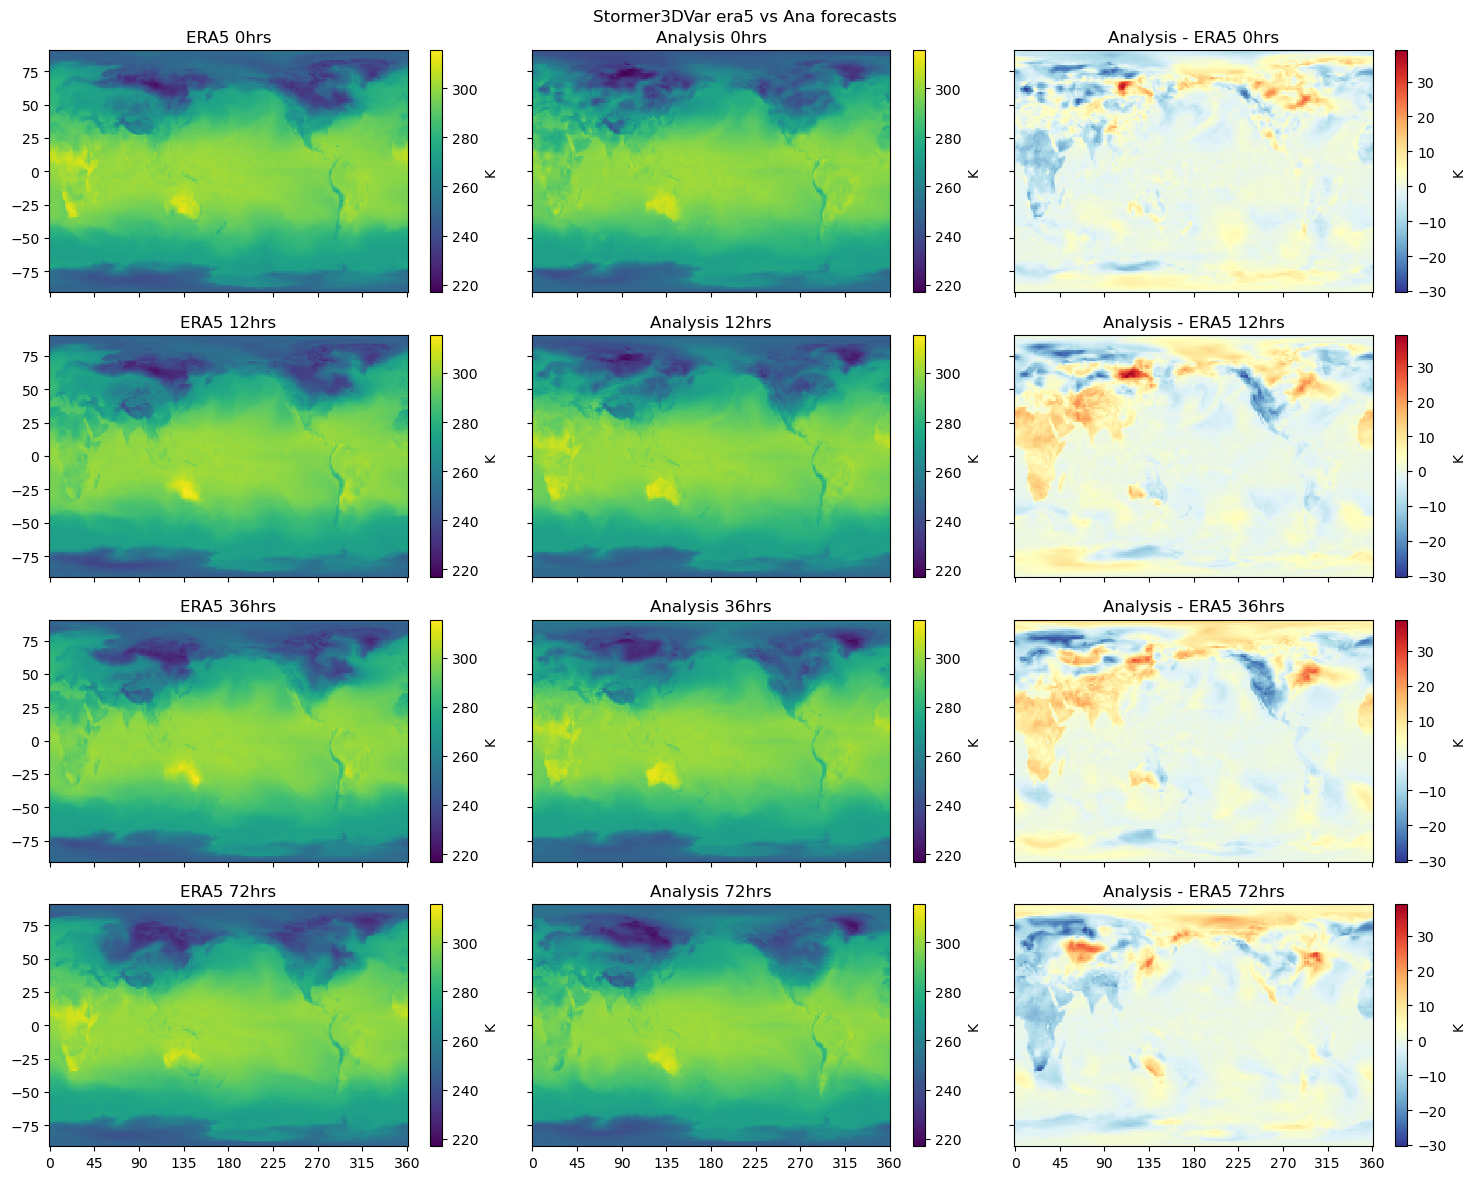

In [22]:
def denorm(x_np,stormer_wrapper):
    x_torch = torch.from_numpy(x_np)
    x_torch_denorm = stormer_wrapper.reverse_inp_transform(x_torch)
    x_np_denorm = x_torch_denorm.numpy()
    return x_np_denorm

lat = np.linspace(-90,90,128)
lon = np.linspace(0,360,256)

forecast_scales = [0,12,36,72]

ana_init = ana_fc['0'][:]
print('ana_init.shape min,mean,max : ',ana_init.shape,np.min(ana_init),np.mean(ana_init),np.max(ana_init))
#ana_denorm = stormer_wrapper.reverse_inp_transform(torch.from_numpy(ana_fc['0'][:]))
ana_denorm = denorm(ana_init,stormer_wrapper)
print('ana_denorm.shape min,mean,max : ',ana_denorm[0].shape,np.min(ana_denorm[0]),np.mean(ana_denorm[0]),np.max(ana_denorm[0]))

var_lim_min = float(np.inf)
var_lim_max = float(-np.inf)
for fs in forecast_scales:
    ana_fc_denorm = denorm(ana_fc[str(fs)][:],stormer_wrapper)
    var_lim_min = min(var_lim_min,np.min(raw_fc[str(fs)][0]),np.min(raw_fc[str(fs)][0]))
    var_lim_max = max(var_lim_max,np.max(raw_fc[str(fs)][0]),np.max(raw_fc[str(fs)][0]))
    var_lim_min = min(var_lim_min,np.min(ana_fc_denorm[0]),np.min(ana_fc_denorm[0]))
    var_lim_max = max(var_lim_max,np.max(ana_fc_denorm[0]),np.max(ana_fc_denorm[0]))
print('var_lim_min :',var_lim_min)
print('var_lim_max :',var_lim_max)

inc_lim_min = float(np.inf)
inc_lim_max = float(-np.inf)
for fs in forecast_scales:
    ana_fc_denorm = denorm(ana_fc[str(fs)][:],stormer_wrapper)
    inc_lim_min = min(inc_lim_min,np.min(ana_fc_denorm[0]-raw_fc[str(fs)][0]))
    inc_lim_max = max(inc_lim_max,np.max(ana_fc_denorm[0]-raw_fc[str(fs)][0]))
print('inc_lim_min :',inc_lim_min)
print('inc_lim_max :',inc_lim_max)

fig, axs = plt.subplots(4, 3, sharex = True, sharey = True, figsize=(15,12))
for i,fs in enumerate(forecast_scales):
    ana_fc_denorm = denorm(ana_fc[str(fs)][:],stormer_wrapper)

    pc_era50 = axs[i,0].pcolormesh(lon, lat, raw_fc[str(fs)][0], cmap='viridis', vmin=var_lim_min, vmax=var_lim_max)
    plt.colorbar(pc_era50, ax = axs[i, 0],label='K')
    axs[i, 0].set_title('ERA5 {}hrs'.format(fs))
    axs[i, 0].set_xticks(np.linspace(0,360,9))

    pc_ana0 = axs[i,1].pcolormesh(lon, lat, ana_fc_denorm[0], cmap='viridis', vmin=var_lim_min, vmax=var_lim_max)
    plt.colorbar(pc_ana0, ax = axs[i, 1],label='K')
    axs[i, 1].set_title('Analysis {}hrs'.format(fs))

    pc_inc0 = axs[i,2].pcolormesh(lon, lat, ana_fc_denorm[0]-raw_fc[str(fs)][0], 
                                  cmap='RdYlBu_r', vmin=inc_lim_min, vmax=inc_lim_max)
    plt.colorbar(pc_inc0, ax = axs[i, 2], label='K')
    axs[i, 2].set_title('Analysis - ERA5 {}hrs'.format(fs))

fig.suptitle('Stormer3DVar era5 vs Ana forecasts')
plt.tight_layout()

plt.savefig('/eagle/MDClimSim/mjp5595/ml4dvar/plots/stormer3d_era5_vs_ana_forecasts.png')
#axs[0, 0].set_ylabel('Lat')
#axs[1, 0].set_ylabel('Lat')
#axs[1, 0].set_xlabel('Lon')
#axs[1, 1].set_xlabel('Lon')
#axs[1, 2].set_xlabel('Lon')


### Validate old forecasts for B

In [69]:
raw_fc_f_old = '/eagle/MDClimSim/mjp5595/data/stormer/stormer_val_forecasts/0000.h5'
raw_fc_f_2020 = '/eagle/MDClimSim/mjp5595/data/stormer/stormer_val_forecasts_2020/0000.h5'

raw_fc_old = h5py.File(raw_fc_f_old)
raw_fc_2020 = h5py.File(raw_fc_f_2020)

raw_fc_old_6 = raw_fc_old['6'][0]
raw_fc_old_12 = raw_fc_old['12'][0]

raw_fc_2020_6 = raw_fc_2020['6'][0]
raw_fc_2020_12 = raw_fc_2020['12'][0]

diff_6 = raw_fc_2020_6 - raw_fc_old_6
diff_12 = raw_fc_2020_12 - raw_fc_old_12

print('diff 6,12 :',np.max(diff_6),np.max(diff_12))

diff 6,12 : 0.0 0.0
